# Machine Learning Project
## Mbusu-Team

### **House Prices Dataset**

### **Data Understanding**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sb
from scipy.stats import entropy
import math
import sys
plt.style.use('ggplot')


hue_order = ["HIGH","MEDIUM","LOW"]
palette = {
    'LOW': 'tab:red',
    'MEDIUM': 'tab:blue',
    'HIGH': 'tab:green',
}

TARGET_FEATURE = 'SalePrice'
TARGET_FEATURE_CONTI = 'salePriceNum'
TARGET_FEATURE_VALUES = ['LOW', 'MEDIUM', 'HIGH']

#### INFORMATION GAIN FUNTION 

In [2]:
def IG(df, target, attribute):

    df_sub = []

    for value in df[attribute].unique():
        df_sub.append( df[df[attribute] == value] )
        
    counts = df[target].value_counts()
    probs = counts / len(df)
    e = -np.sum(probs * np.log2(probs))

    information_gain = e 
    for df_s in df_sub:
        counts = df_s[target].value_counts()
        probs = counts / len(df_s)
        e_s = -np.sum(probs * np.log2(probs))
        information_gain -= len(df_s) / len(df) * e_s

    return information_gain


#### PLOTS

##### Plot frequencies and percentages

In [3]:
def frequencies_and_percentages(df, target, attribute):
    fig, ax = plt.subplots(1,2, figsize=(15,5))

    dfp = df[[attribute,target]].pivot_table(index = attribute, columns=[target],  aggfunc=len)
    dfp = dfp.fillna(0)
    dfpp = dfp.pipe(lambda d : 100*d.div(sum(d[v] for v in df[target].unique()), axis='index'))
    display(dfpp)
    dfp.plot(kind='bar', ax=ax[0]  , title = f"Count by {attribute}" ,  color = ["red","blue","green"] )
    dfpp.plot(kind='bar',ax=ax[1] , stacked=True , title  = f"Percentage by {attribute}", legend = False , color = ["red","blue","green"])

##### Histplot

In [4]:

def histplot(df,target, attribute):
    sb.histplot(x = df[attribute], hue = target, data = df, kde=True , hue_order = hue_order, palette = palette)
    plt.show()

#### Read data

In [5]:
df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv', keep_default_na = False, low_memory= False )
df["salePriceNum"] = df.SalePrice.rename("salePriceNum")
df["SalePrice"] = pd.cut(df["salePriceNum"], bins = [0,150000,300000 - 1 ,int(sys.maxsize)], labels=["LOW","MEDIUM","HIGH"])

In [6]:
df.shape

(1460, 82)

In [7]:
df.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,salePriceNum
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### View Data

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,salePriceNum
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,2,2008,WD,Normal,MEDIUM,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,NA,NA,NA,0,5,2007,WD,Normal,MEDIUM,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,9,2008,WD,Normal,MEDIUM,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,2,2006,WD,Abnorml,LOW,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,NA,NA,NA,0,12,2008,WD,Normal,MEDIUM,250000


#### Info data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   int64   
 2   MSZoning       1460 non-null   object  
 3   LotFrontage    1460 non-null   object  
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   object  
 6   Alley          1460 non-null   object  
 7   LotShape       1460 non-null   object  
 8   LandContour    1460 non-null   object  
 9   Utilities      1460 non-null   object  
 10  LotConfig      1460 non-null   object  
 11  LandSlope      1460 non-null   object  
 12  Neighborhood   1460 non-null   object  
 13  Condition1     1460 non-null   object  
 14  Condition2     1460 non-null   object  
 15  BldgType       1460 non-null   object  
 16  HouseStyle     1460 non-null   object  
 17  OverallQual    1460 non-null   in

#### Classes

In [10]:
df.SalePrice.unique()

['MEDIUM', 'LOW', 'HIGH']
Categories (3, object): ['LOW' < 'MEDIUM' < 'HIGH']

#### Undestanding the effect of the attributes

##### ID

(array([1., 1., 1., ..., 1., 1., 1.]),
 array([1.00000000e+00, 1.99931507e+00, 2.99863014e+00, ...,
        1.45800137e+03, 1.45900068e+03, 1.46000000e+03]),
 <BarContainer object of 1460 artists>)

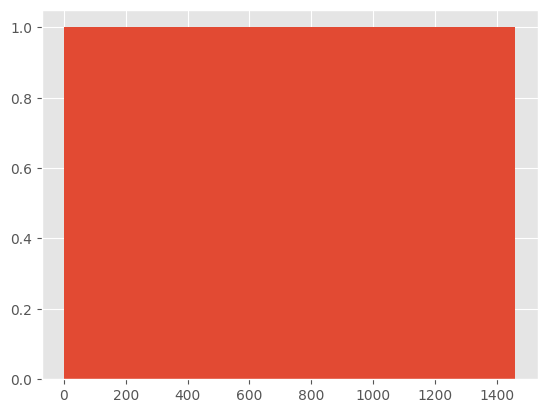

In [11]:
plt.hist(df["Id"], bins= len(df))

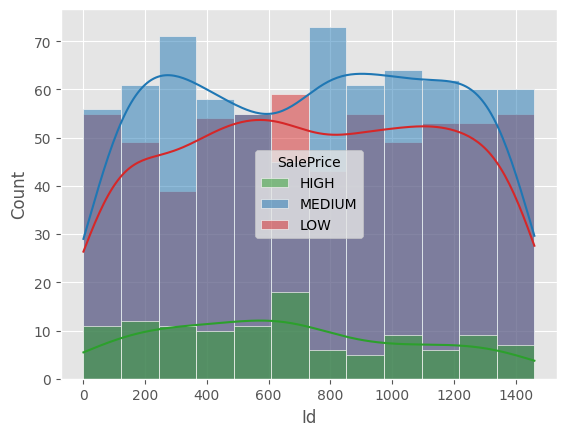

In [12]:
histplot(df,'SalePrice',"Id")

In [13]:
print("Max Entropy ( Log n ) -> " + str(math.log(len(df), 2)))

counts = df['Id'].value_counts()
probs = counts / len(df)
e = -np.sum(probs * np.log2(probs))
print("Entropy -> "+ str(e))

Max Entropy ( Log n ) -> 10.51175265376738
Entropy -> 10.511752653767381


##### MSSubClass

SalePrice,LOW,MEDIUM,HIGH
MSSubClass,,,
20,43.097015,47.761194,9.141791
30,97.101449,2.898551,0.000000
40,50.000000,50.000000,0.000000
45,100.000000,0.000000,0.000000
50,72.222222,25.000000,2.777778
60,2.006689,80.936455,17.056856
70,45.000000,51.666667,3.333333
75,43.750000,43.750000,12.500000
80,29.310345,68.965517,1.724138


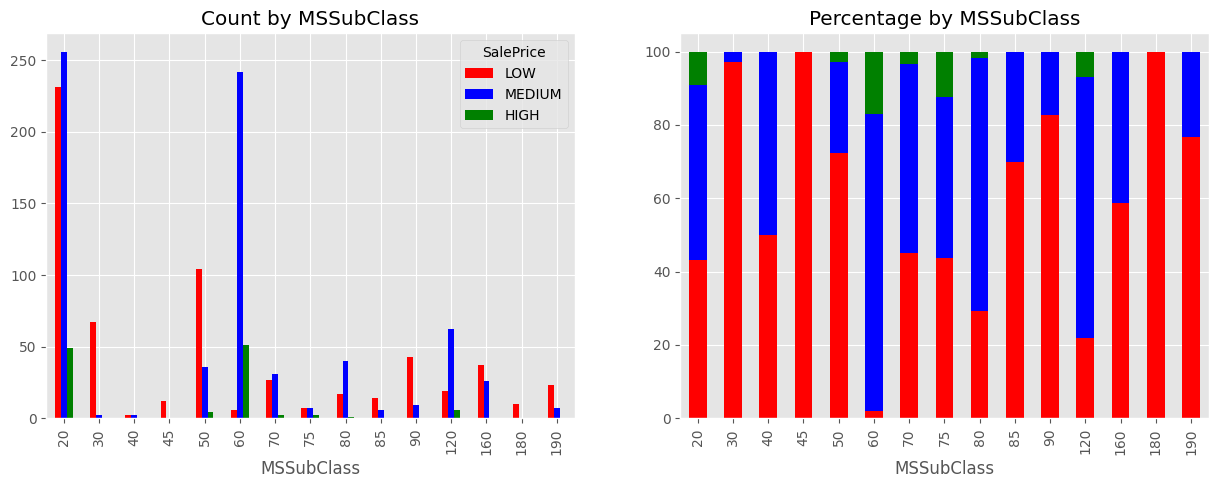

In [14]:
df["MSSubClass"] = df["MSSubClass"].astype("category")
frequencies_and_percentages(df, 'SalePrice', 'MSSubClass')

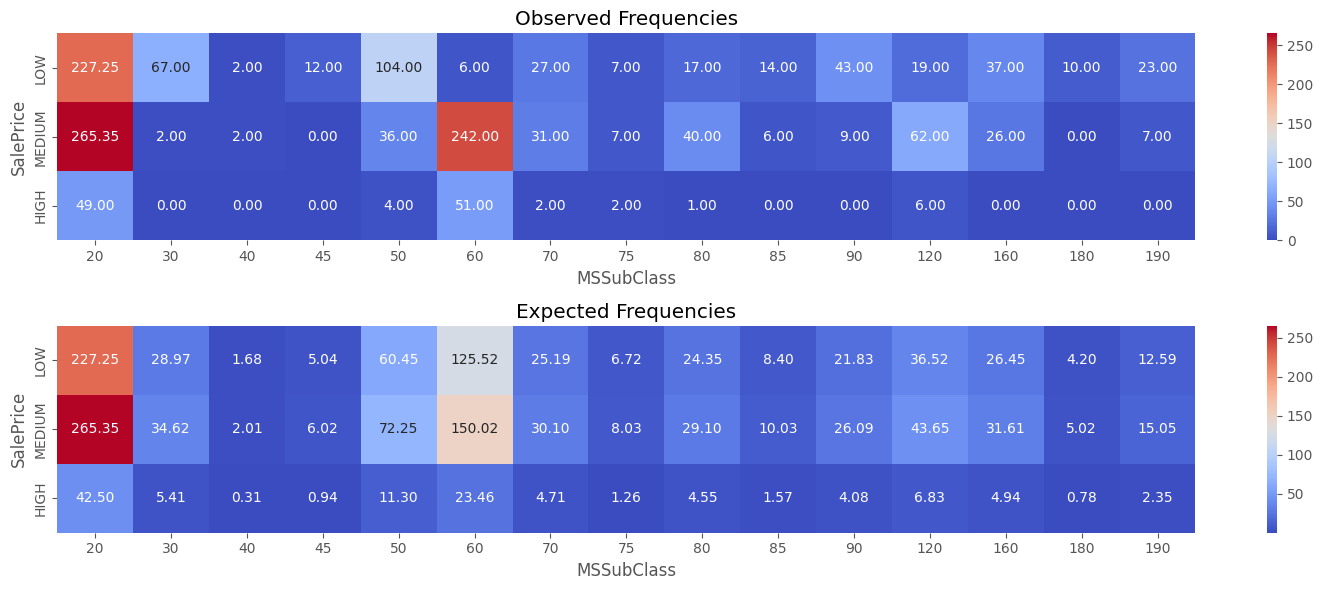

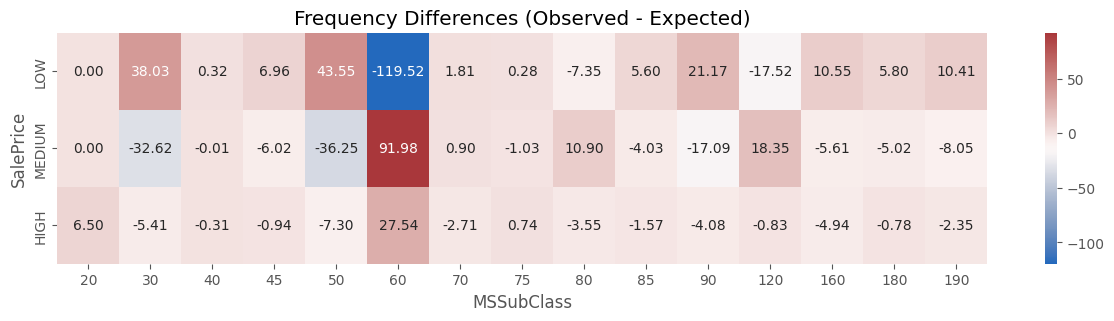

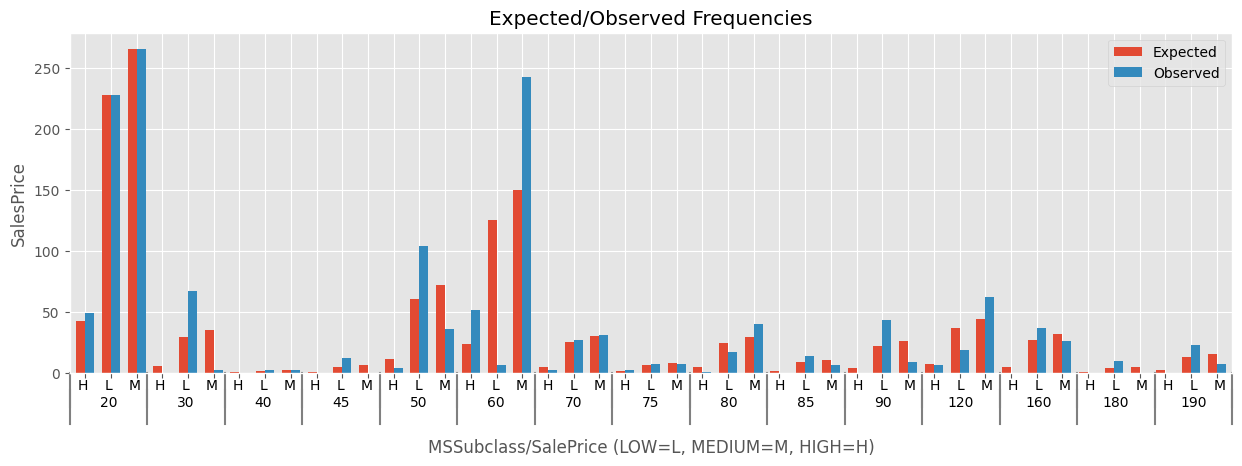

Chi-square Test - Outcome
P-Value: 1.122234664911419e-81 [<0.05]


In [27]:
#IG(df,"SalePrice","MSSubClass")

from itertools import groupby

def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]
    
def label_group_bar_table(ax, df):
    ypos = -.05
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            if pos % 3 == 0: add_line(ax, pos*scale, ypos - .052)
            pos += rpos
        add_line(ax, pos*scale , ypos - .052)
        ypos -= .05

def barplot_diffvalues(dataset, feature_name):
    df = dataset.reset_index().groupby([feature_name, TARGET_FEATURE]).sum()
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(111)
    #print(dataset)
    dataset.pivot_table(index = [feature_name, TARGET_FEATURE], columns=['__Type']).plot(kind='bar', ax=ax, width=.7)
    
    labels = ['' for item in ax.get_xticklabels()]
    ax.set_xticklabels(labels)
    ax.set_title('Expected/Observed Frequencies')
    ax.set_xlabel('MSSubclass/SalePrice (LOW=L, MEDIUM=M, HIGH=H)', labelpad=40)
    ax.set_ylabel('SalesPrice')
    plt.legend(['Expected', 'Observed'])
    label_group_bar_table(ax, df)

    fig.subplots_adjust(bottom=.1*df.index.nlevels)
    plt.show()

def stattest_quali(df, feature_name: str, fig_width=15, fig_height=3):

    #
    # chi-square test and expected frequencies matrix
    #
    crosstab = pd.crosstab(df[feature_name], df[TARGET_FEATURE])
    chi_square_args = crosstab.values
    _, p_value, _, _ = stats.chi2_contingency(chi_square_args)

    expf_crosstab = pd.DataFrame(crosstab)
    for idx in expf_crosstab.index:
        for col in expf_crosstab.columns:
            expf_crosstab.at[idx, col] = crosstab.loc[idx].values.sum() * crosstab[col].values.sum() / crosstab.values.sum()

    #
    # observed/expected frequencies heatmaps
    #
    fig, ax = plt.subplots(2, 1, figsize=(fig_width, fig_height * 2))
    sb.heatmap(crosstab.T, ax=ax[0], annot=True, cmap='coolwarm', fmt='.2f')
    sb.heatmap(expf_crosstab.T, ax=ax[1], annot=True, cmap='coolwarm', fmt='.2f')
    ax[0].set_title('Observed Frequencies')    
    ax[1].set_title('Expected Frequencies')
    fig.tight_layout()
    plt.show()

    #
    # frequencies difference heatmap
    #
    obsexp_diff_df = crosstab - expf_crosstab
    fig = plt.figure(figsize=(fig_width, fig_height))
    plt.title("Frequency Differences (Observed - Expected)")
    sb.heatmap(obsexp_diff_df.T, annot=True, cmap='vlag', fmt='.2f')
    
    #
    # observed/expected frequencies barplot
    #
    value_vars_x = [val + '_x' for val in TARGET_FEATURE_VALUES]
    value_vars_y = [val + '_y' for val in TARGET_FEATURE_VALUES]
    value_vars_xy = value_vars_x + value_vars_y
    obs_exp_df = pd.merge(crosstab, expf_crosstab, on=[feature_name]).reset_index()
    obs_exp_df = pd.melt(obs_exp_df, id_vars=[feature_name], value_vars=value_vars_xy)
    obs_exp_df['__Type'] = obs_exp_df[TARGET_FEATURE]

    for val in value_vars_x: obs_exp_df.loc[obs_exp_df['__Type'] == val, '__Type'] = '__OBS'
    for val in value_vars_y: obs_exp_df.loc[obs_exp_df['__Type'] == val, '__Type'] = '__EXP'
    
    for price in TARGET_FEATURE_VALUES:
        for obs_exp in ['x', 'y']:
            obs_exp_df.loc[obs_exp_df[TARGET_FEATURE] == price + '_' + obs_exp, TARGET_FEATURE] = price[0]

    barplot_diffvalues(obs_exp_df, feature_name)

    #
    # chi-square test outcome
    #
    p_value_info = '[<0.05]' if p_value < 0.05 else ''
    print("Chi-square Test - Outcome")
    print("P-Value:", p_value, p_value_info)

stattest_quali(df, 'MSSubClass')


#### **`HouseStyle` - Unpacking `MSubClass`**

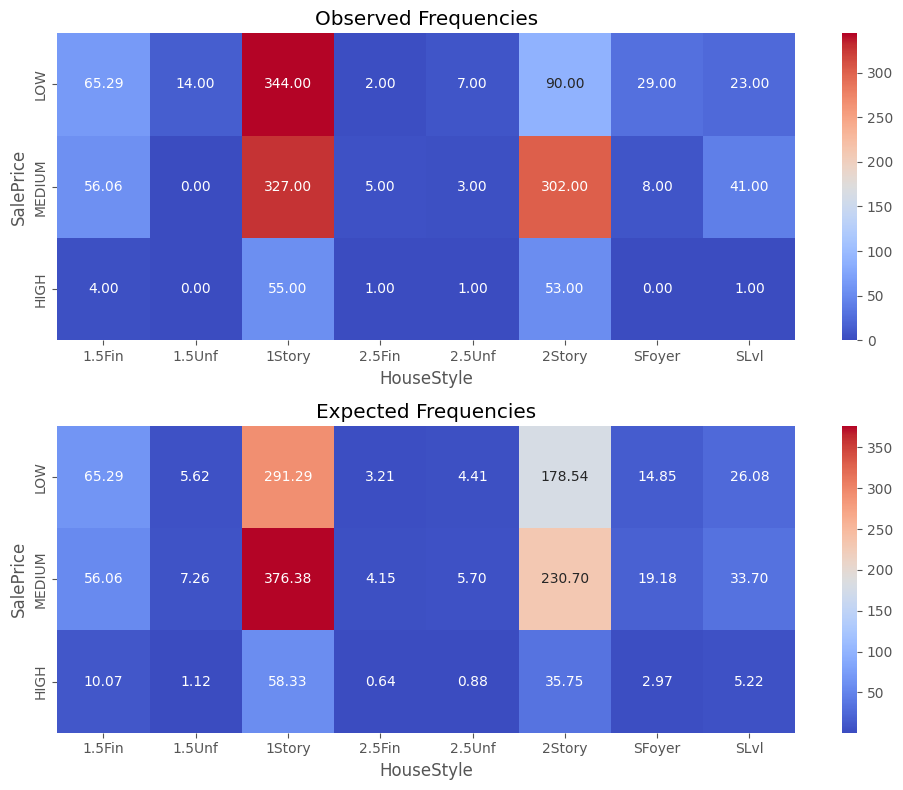

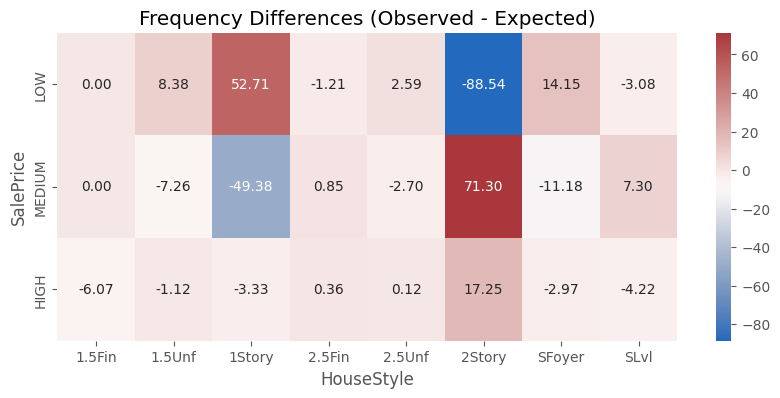

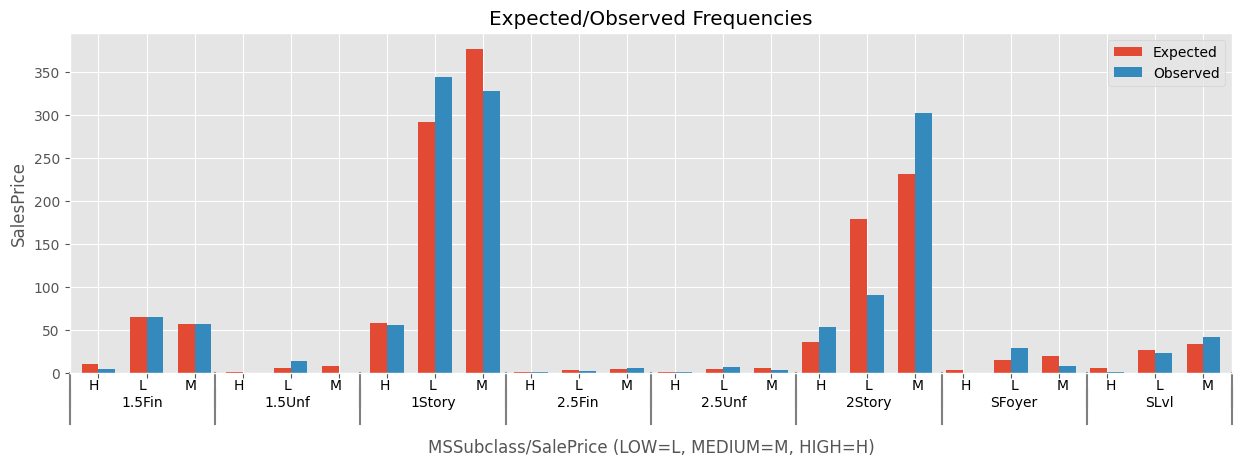

Chi-square Test - Outcome
P-Value: 5.042764923498675e-35 [<0.05]


In [28]:
#frequencies_and_percentages(df, 'SalePrice', 'HouseStyle')

df["HouseStyle"] = df["HouseStyle"].astype("category")
stattest_quali(df, 'HouseStyle', fig_width=10, fig_height=4)

#### **`YearBuilt` - Unpacking `MSubClass`**

ANOVA Test - Outcome
P-Value: 3.6397089066086615e-118 [<0.05]


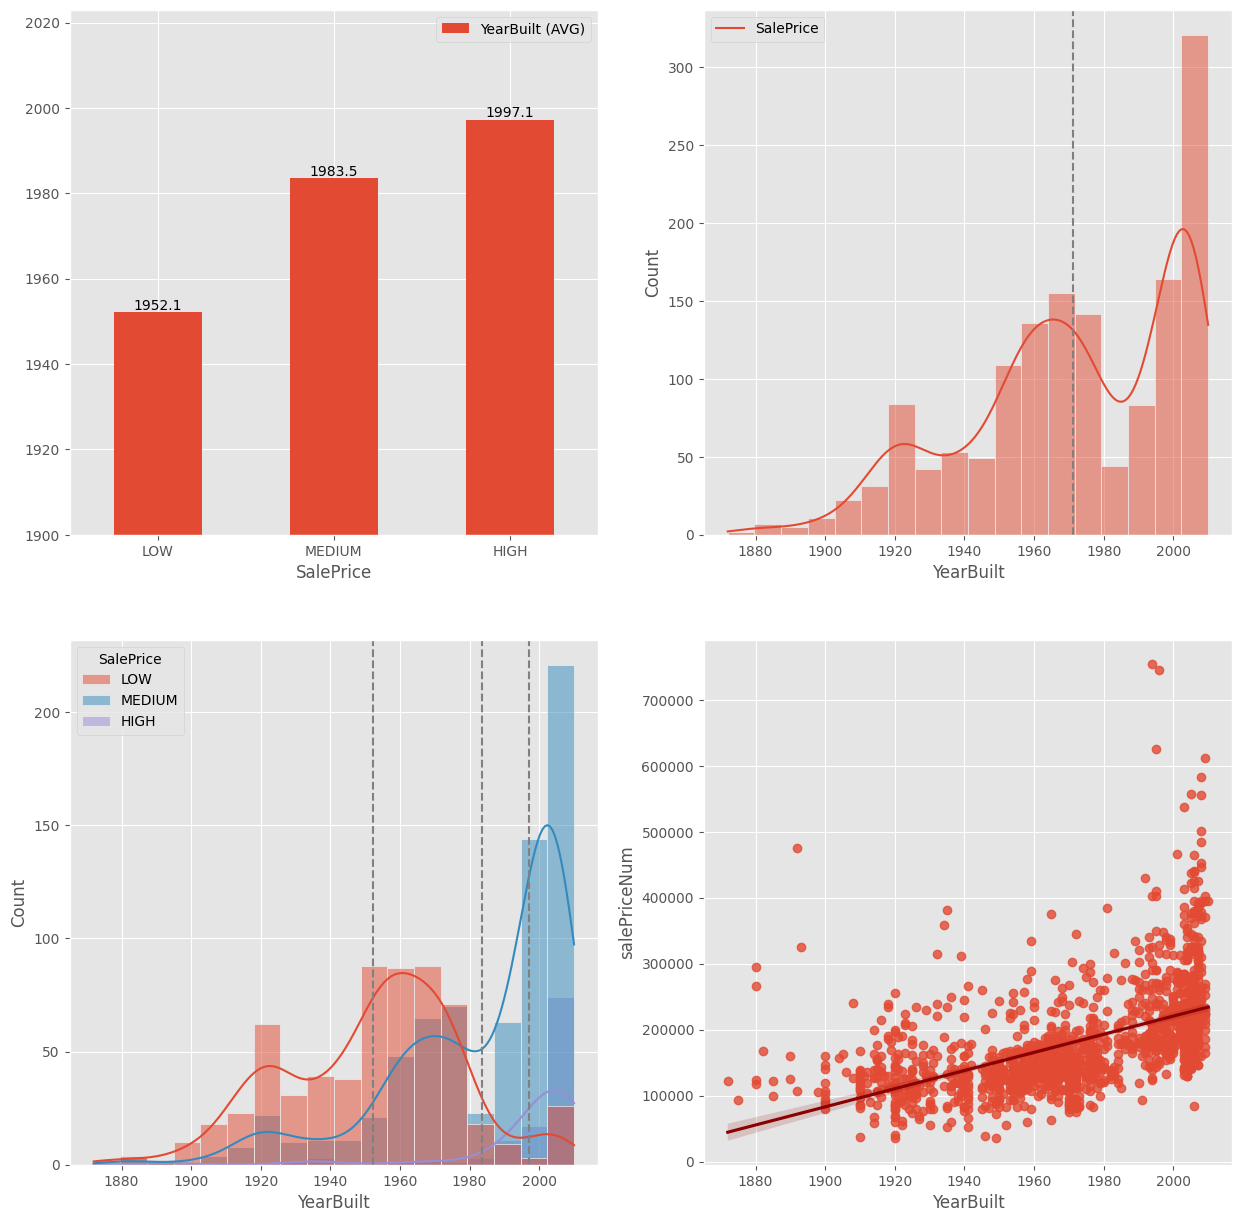

In [17]:
def stattest_quanti(df, feature_name: str, low_limit=0, upper_limit=100):

    #
    # plot means w.r.t. target categories
    #
    df_conti_origin = df[[feature_name, TARGET_FEATURE, TARGET_FEATURE_CONTI]]
    df_categ_origin = df[[feature_name, TARGET_FEATURE]]
    df = df_categ_origin.groupby(TARGET_FEATURE)
    mean_df = df.mean().reset_index().rename(columns={feature_name: feature_name + ' (AVG)'})

    _, ax = plt.subplots(2, 2, figsize=(15, 15))

    mean_df.plot(kind='bar', x=TARGET_FEATURE, ax=ax[0, 0])
    for container in ax[0, 0].containers:
        ax[0, 0].bar_label(container, fmt='%.1f')
    ax[0, 0].set_ylim(low_limit, upper_limit)
    ax[0, 0].tick_params(labelrotation=0)
    #plt.xticks(rotation=0)
    
    sb.histplot(x=feature_name, data=df_categ_origin, kde=True, ax=ax[0, 1])
    ax[0, 1].axvline(x=df_categ_origin[feature_name].mean(), color='gray', ls='--', lw=1.5)
    ax[0, 1].legend([TARGET_FEATURE])

    sb.histplot(x=feature_name, hue=TARGET_FEATURE, data=df_categ_origin, kde=True, ax=ax[1, 0])
    for tval in TARGET_FEATURE_VALUES:
        ax[1, 0].axvline(x=df_categ_origin[df_categ_origin[TARGET_FEATURE] == tval][feature_name].mean(), color='gray', ls='--', lw=1.5)
    
    sb.regplot(x=feature_name, y=TARGET_FEATURE_CONTI, data=df_conti_origin, line_kws={"color": "darkred"}, ax=ax[1, 1])
    
    #
    # perform ANOVA test
    #
    anova_args = tuple(df[feature_name].apply(list).reset_index()[feature_name])
    f_statistic, p_value = stats.f_oneway(*anova_args)

    p_value_info = '[<0.05]' if p_value < 0.05 else ''
    print("ANOVA Test - Outcome")
    print("P-Value:", p_value, p_value_info)

stattest_quanti(df,'YearBuilt', low_limit=1900, upper_limit=2023)

#### **`BldgType` (Type of dwelling) - Unpacking `MSubClass`**

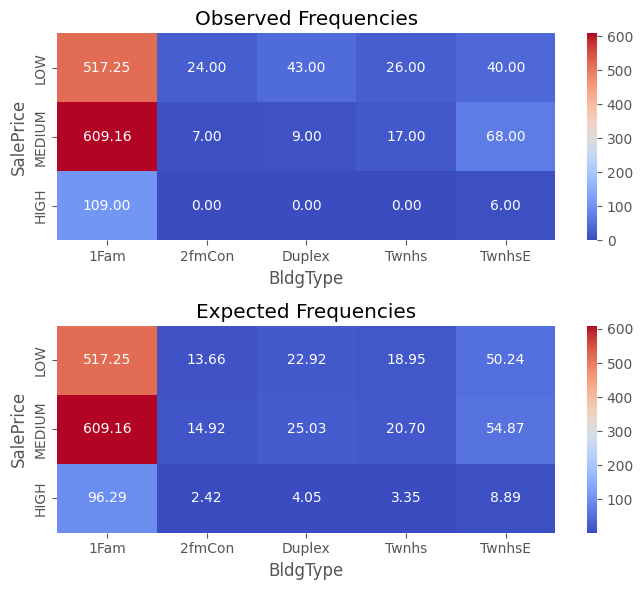

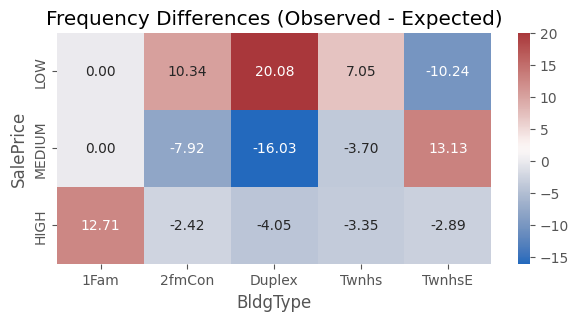

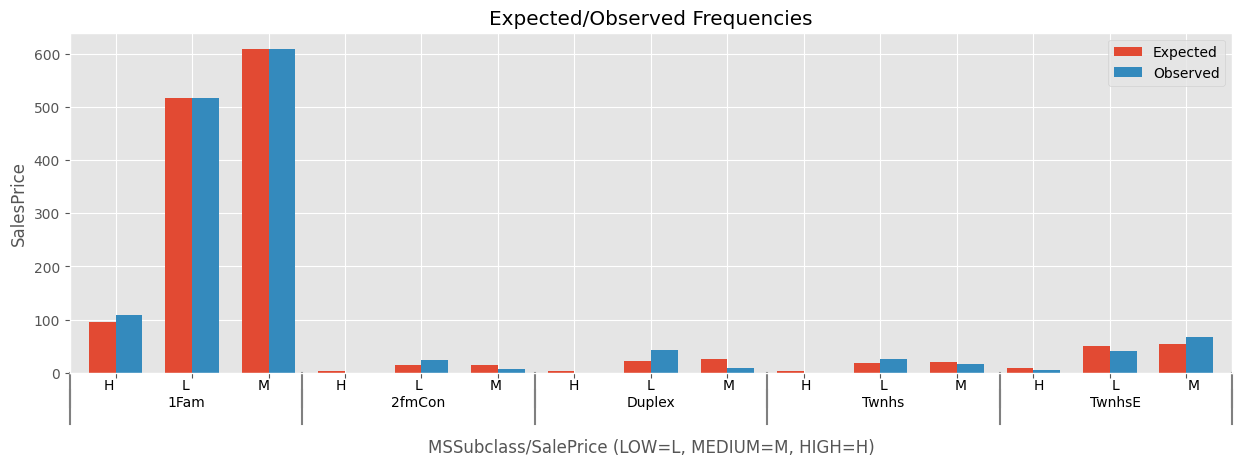

Chi-square Test - Outcome
P-Value: 1.5729799192056653e-11 [<0.05]


In [29]:
df['BldgType'] = df['BldgType'].astype("category")
stattest_quali(df, 'BldgType', fig_width=7)

#### **`LotFrontage` - Linear feet of street connected to property**

ANOVA Test - Outcome
P-Value: 5.1103783738436643e-14 [<0.05]


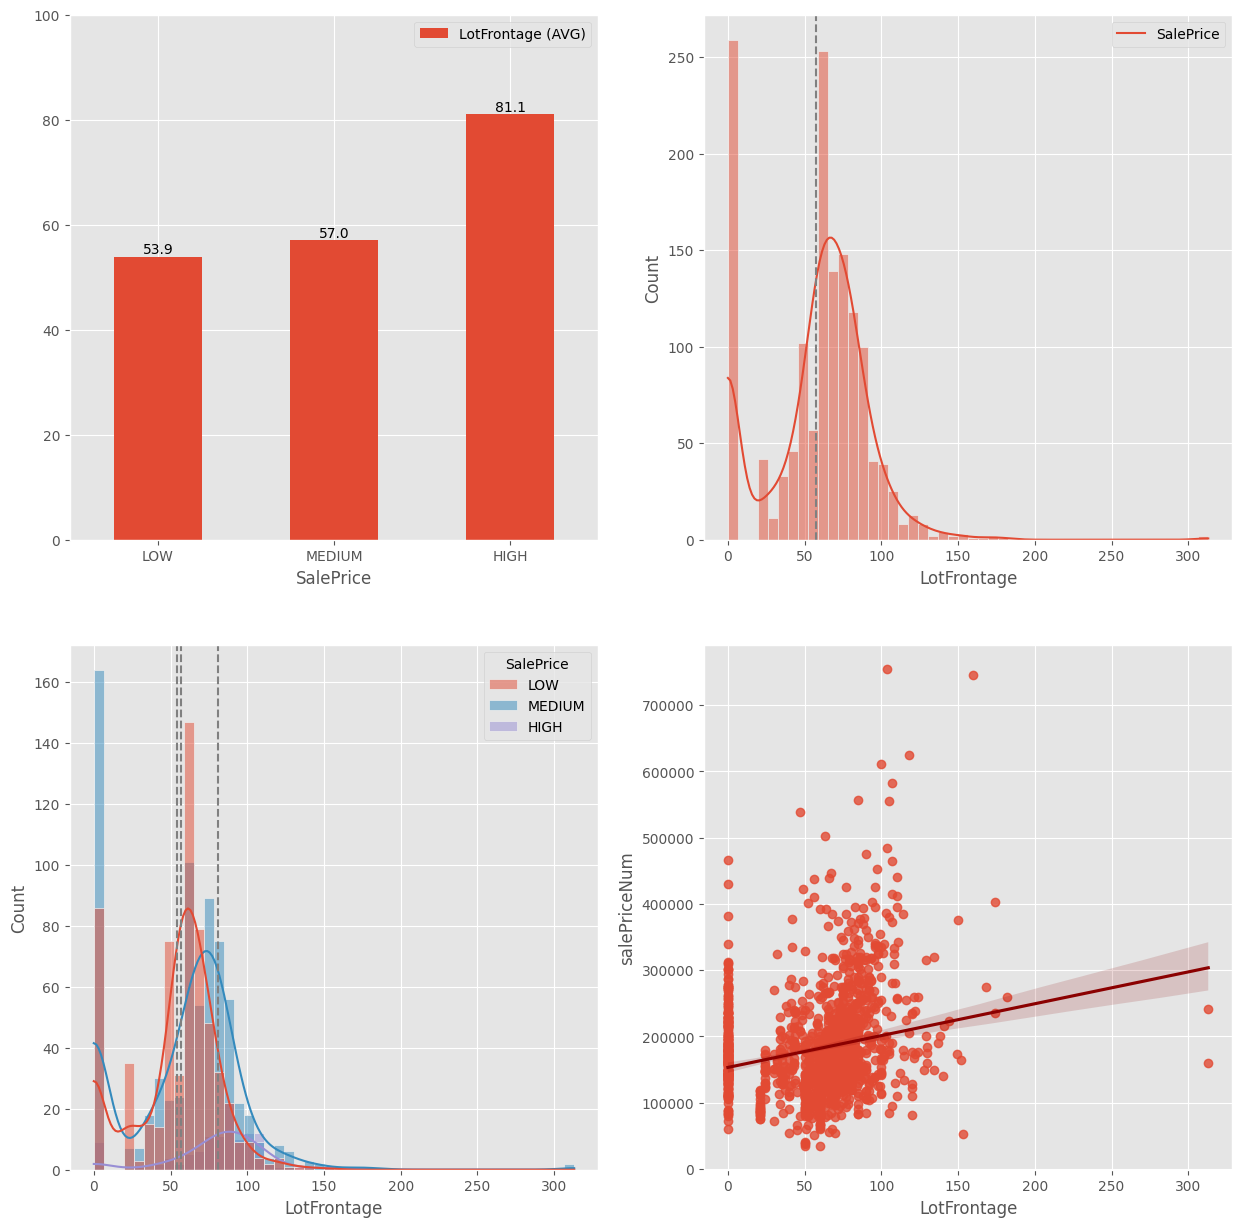

In [19]:
df['LotFrontage'] = df['LotFrontage'].fillna(0).replace('NA', 0)
df['LotFrontage'] = df['LotFrontage'].astype("int64")
stattest_quanti(df,'LotFrontage')

##### MSZoning

In [20]:
df["MSZoning"] = df["MSZoning"].astype("category")

In [21]:
IG(df, "MSZoning", "SalePrice")


c:\Users\Agostino\AppData\Local\Programs\Python\Python37-32\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.12336354296168264

<AxesSubplot:>

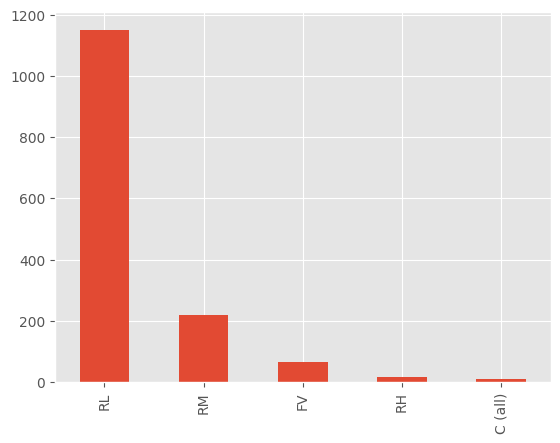

In [22]:
df["MSZoning"].value_counts().plot(kind="bar")

SalePrice,LOW,MEDIUM,HIGH
MSZoning,,,
C (all),100.000000,0.000000,0.000000
FV,6.153846,84.615385,9.230769
RH,75.000000,25.000000,0.000000
RL,35.708080,55.082537,9.209383
RM,83.486239,15.137615,1.376147


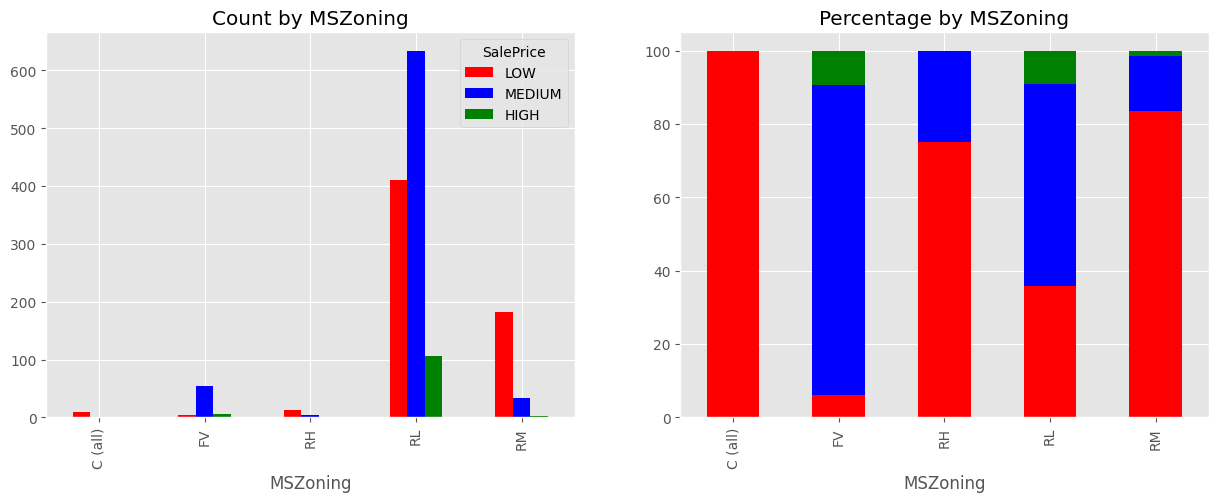

In [23]:
frequencies_and_percentages(df, 'SalePrice', 'MSZoning')

##### YearBuilt

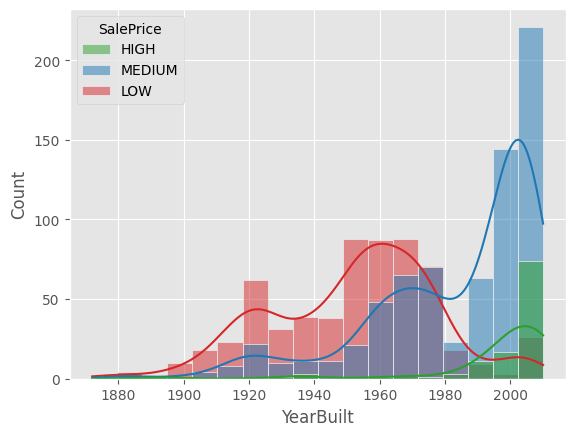

In [24]:
histplot(df,'SalePrice',"YearBuilt")
    

##### Na

In [25]:
sb.histplot(x = df["Na"], hue = 'Drug', data = df, kde=True)
plt.show()

KeyError: 'Na'

##### K

In [ ]:
sb.histplot(x = df["K"], hue = 'Drug', data = df, kde=True)
plt.show()

#### Correlation

In [ ]:
sb.pairplot(df, hue = 'Drug')
plt.show()

In [ ]:
plt.figure(figsize=(15, 7))
sb.heatmap(df.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()

#### Results

| Attribute                     | Description                                                                                   |
|------------------------------	|----------------------------------------------	                                                |
| ID                        	| Maximum entropy and not correlated  with the target attribute, removed                        |
| Age               	        | Good correlation with values: DrugA and DrugB of the target attribute 	                    |
| Sex                    	    | Seems to not influence the target attribute, low IG, may be removed     	                    |
| BP                	        | Good predictor, it influences the target attribute                                            |
| Cholesterol           	    | Good predictor, it influences two attribute value of the target attribute: DrugX and DrugC    |
| Na                            | Good predictor                              	                                                |
| K 	                        | Good predictor 	                                                                            |
| Drug            	            | Class label                              	                                                |

### **Data Preparation**

#### Remove null values

In [ ]:
df.dropna(inplace = True)
df.isna().sum()

#### Remove attributes

In [ ]:
df.drop(columns=['ID'], inplace = True)
df_ws = df.drop(columns=['Sex'])

#### Set type category

In [ ]:
df["Sex"] = df["Sex"].astype("category")
df["BP"] = df["BP"].astype("category")
df["Cholesterol"] = df["Cholesterol"].astype("category")
df["Drug"] = df["Drug"].astype("category")


df_ws["BP"] = df["BP"].astype("category")
df_ws["Cholesterol"] = df["Cholesterol"].astype("category")
df_ws["Drug"] = df["Drug"].astype("category")

#### Binarization

In [ ]:
# DF 
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Drug')
df_bin = pd.get_dummies(df, columns = cat_attributes)

## DF WS
cat_attributes = list(df_ws.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Drug')
df_bin_ws = pd.get_dummies(df_ws, columns = cat_attributes)

df_bin.head()
df_bin_ws.head()

### **Modeling**

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

#### Creation of training, valuation and test sets

In [ ]:
seed = 101
test_size = .3
val_size = .2

# # DF 
# x = np.array(df.drop(columns="Drug").values)
# y = np.array(df['Drug'].values)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

# DF BIN 
x_bin = np.array(df_bin.drop(columns="Drug").values)
y_bin = np.array(df_bin['Drug'].values)

x_train_bin, x_test_bin, y_train_bin, y_test_bin = train_test_split(x_bin, y_bin, test_size=test_size, random_state=seed)
x_train_bin, x_val_bin, y_train_bin, y_val_bin = train_test_split(x_train_bin, y_train_bin, test_size=val_size, random_state=seed)


# DF WITHOUT SEX
x_bin_ws = np.array(df_bin_ws.drop(columns="Drug").values)
y_bin_ws = np.array(df_bin_ws['Drug'].values)

# DF BIN
x_train_bin_ws, x_test_bin_ws, y_train_bin_ws, y_test_bin_ws = train_test_split(x_bin_ws, y_bin_ws, test_size=test_size, random_state=seed)
x_train_bin_ws, x_val_bin_ws, y_train_bin_ws, y_val_bin_ws = train_test_split(x_train_bin_ws, y_train_bin_ws, test_size=val_size, random_state=seed)


#### Creation of models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

#### WITH SEX

In [ ]:
# models = []
# models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
# models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
# models.append(('GaussianNaiveBayes', GaussianNB()))
# models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
#                                               random_state=seed)))

models_bin = []
models_bin.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models_bin.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models_bin.append(('GaussianNaiveBayes', GaussianNB()))
models_bin.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))

for name, model_bin in models_bin:
    print(name)
    model_bin.fit(x_train_bin, y_train_bin)

    y_val_pred = model_bin.predict(x_val_bin)
    
    print('Classification metrics: ')
    print(classification_report(y_val_bin, y_val_pred, zero_division=1))

#### WS

In [ ]:
models_bin_ws = []
models_bin_ws.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models_bin_ws.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models_bin_ws.append(('GaussianNaiveBayes', GaussianNB()))
models_bin_ws.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))

for name, model_bin_ws in models_bin_ws:
    print(name)
    model_bin_ws.fit(x_train_bin_ws, y_train_bin_ws)

    y_val_pred_ws = model_bin_ws.predict(x_val_bin_ws)
    
    print('Classification metrics: ')
    print(classification_report(y_val_bin_ws, y_val_pred_ws, zero_division=1))

### **Evaluation**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

#### Precision, Recall and Accuracy

*For the decison tree is better to use Gini Index and ds_ws*

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=seed)
model.fit(x_train_bin_ws, y_train_bin_ws)
predictions = model.predict(x_test_bin_ws)

In [ ]:
print(f'Accuracy: {accuracy_score(y_test_bin_ws, predictions):.2f}')

In [ ]:
a = df["Drug"].unique().tolist()
a.sort() 
make_confusion_matrix(confusion_matrix(y_test_bin_ws, predictions), categories= a , cmap='binary')

In [ ]:
print('Classification report')
print(classification_report(y_test_bin_ws, predictions))

##### **Compute the Roc Curve for each class**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
one_hot_encoding = np.array(pd.get_dummies(y_test_bin_ws, columns = ['Drug']))

probs = []
 
for _, model in models_bin_ws:
    model.fit(x_train_bin_ws, y_train_bin_ws)
    proba = model.predict_proba(x_train_bin_ws)
    probs.append(proba)



In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y_train_bin_ws))):
    plt.figure()
    m = 0

    for name, _ in models_bin_ws:
        fpr[i], tpr[i] , _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y_train_bin_ws)[i]))
    plt.legend(loc='lower right')

    plt.show()  